<a href="https://colab.research.google.com/github/Alishba-Hamid258/AI-and-Machine-Learning/blob/main/DecisionTreeClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: import the libraries to start decision tree classification

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree


In [4]:
# prompt: load the file in csv

import pandas as pd
# Assuming your CSV file is named 'your_file.csv'
# Replace 'your_file.csv' with the actual filename
data = pd.read_csv('/content/drug200.csv')
print(data.head()) # Display first few rows to verify loading


   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY


In [5]:
# prompt: find empty and the missing values from above dataset

# Check for missing values
print(data.isnull().sum())

# Check for empty strings
for col in data.columns:
  empty_count = (data[col] == '').sum()
  print(f"Empty strings in '{col}': {empty_count}")


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64
Empty strings in 'Age': 0
Empty strings in 'Sex': 0
Empty strings in 'BP': 0
Empty strings in 'Cholesterol': 0
Empty strings in 'Na_to_K': 0
Empty strings in 'Drug': 0


In [6]:
# prompt: process all the missing values and empty values

# Handling missing values (if any)
# For numerical features, you might impute with mean/median
# For categorical features, you might impute with mode or a new category

for col in data.columns:
    if data[col].dtype == 'object':  # Check if the column is categorical
      data[col] = data[col].fillna(data[col].mode()[0]) # Impute with mode for categorical features
    else:
      data[col] = data[col].fillna(data[col].mean()) # Impute with mean for numerical features


# Handling empty strings (if any)
for col in data.columns:
    data[col] = data[col].replace('', data[col].mode()[0]) #Replace empty strings with mode


In [7]:
# prompt: perform feature enginnering ondata

# Convert categorical features to numerical using one-hot encoding
# Check if the column names exist in your DataFrame
print(data.columns)  # Print the available columns for verification

# Assuming the column names are 'Sex', 'BP', 'Cholesterol', and 'Drug'
# Adjust these names if necessary based on the output of data.columns
categorical_cols = ['Sex', 'BP', 'Cholesterol', 'Drug']
# Check if the categorical columns are present in the DataFrame
if all(col in data.columns for col in categorical_cols):
    data = pd.get_dummies(data, columns=categorical_cols)
else:
    print("Error: One or more specified categorical columns are not found in the DataFrame.")
    # Investigate why the columns are missing and adjust your code accordingly

# Feature scaling (optional but often beneficial)
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numerical_cols = ['Age', 'Na_to_K']  # Add other numerical columns if needed

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical features
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Now you have a data frame with numerical features ready for modeling
print(data.head())

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')
        Age   Na_to_K  Sex_F  Sex_M  BP_HIGH  BP_LOW  BP_NORMAL  \
0 -1.291591  1.286522   True  False     True   False      False   
1  0.162699 -0.415145  False   True    False    True      False   
2  0.162699 -0.828558  False   True    False    True      False   
3 -0.988614 -1.149963   True  False    False   False       True   
4  1.011034  0.271794   True  False    False    True      False   

   Cholesterol_HIGH  Cholesterol_NORMAL  Drug_drugA  Drug_drugB  Drug_drugC  \
0              True               False       False       False       False   
1              True               False       False       False        True   
2              True               False       False       False        True   
3              True               False       False       False       False   
4              True               False       False       False       False   

   Drug_drugX  Drug_drugY  
0       False   

In [8]:
# prompt: extract features

# Assuming 'data' DataFrame from the previous code is available

# Define features (X) and target variable (y)
X = data.drop('Drug_drugY', axis=1)  # Assuming 'Drug_drugY' is the target variable; adjust if needed
y = data['Drug_drugY']

# Now X contains the features and y contains the target variable
print(X.head())
print(y.head())


        Age   Na_to_K  Sex_F  Sex_M  BP_HIGH  BP_LOW  BP_NORMAL  \
0 -1.291591  1.286522   True  False     True   False      False   
1  0.162699 -0.415145  False   True    False    True      False   
2  0.162699 -0.828558  False   True    False    True      False   
3 -0.988614 -1.149963   True  False    False   False       True   
4  1.011034  0.271794   True  False    False    True      False   

   Cholesterol_HIGH  Cholesterol_NORMAL  Drug_drugA  Drug_drugB  Drug_drugC  \
0              True               False       False       False       False   
1              True               False       False       False        True   
2              True               False       False       False        True   
3              True               False       False       False       False   
4              True               False       False       False       False   

   Drug_drugX  
0       False  
1       False  
2       False  
3        True  
4       False  
0     True
1    False
2   

DecisionTrees's Accuracy:  0.9833333333333333


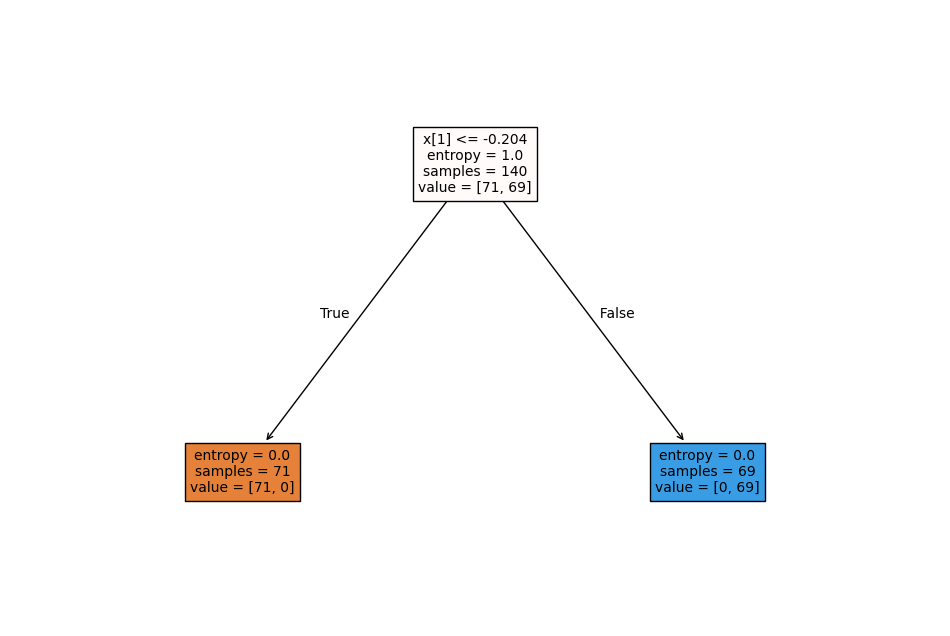

In [9]:
# prompt: train the model

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3) # 70% training and 30% test

# Create a decision tree classifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

# Train the model
drugTree.fit(X_train,y_train)

# Predict the labels for the test set
predTree = drugTree.predict(X_test)

# Evaluate the model
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))


# Optional: Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(drugTree, filled=True, fontsize=10)
plt.show()


In [12]:
# prompt: evaluate data predict model accuracy by calling only throse libraries that are not call before

from sklearn.metrics import classification_report, confusion_matrix
# Assign the predictions to y_pred
y_pred = drugTree.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[37  1]
 [ 0 22]]
              precision    recall  f1-score   support

       False       1.00      0.97      0.99        38
        True       0.96      1.00      0.98        22

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60



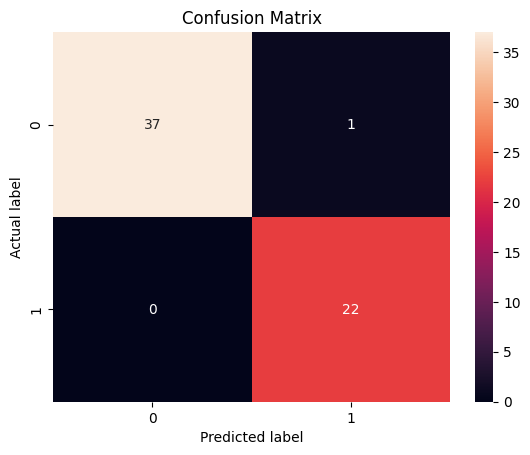

In [13]:
# prompt: show confusion matrix

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix
plt.figure()
sns.heatmap(cnf_matrix, annot=True, fmt='d') # annot=True to annotate cells
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


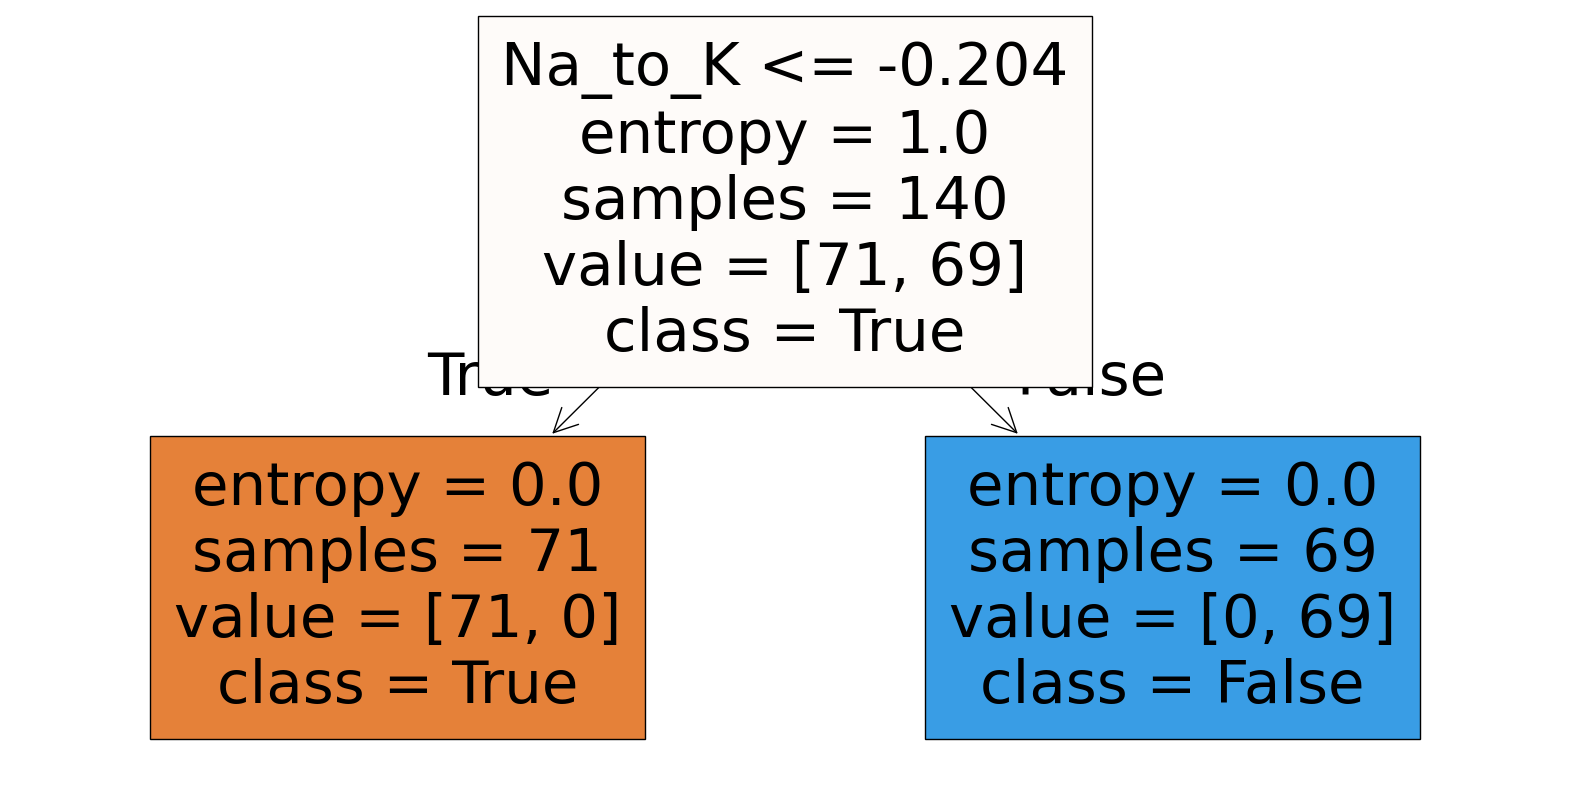

In [15]:
# prompt: visualize the decision tree classifier

# The code to visualize the decision tree is already present in the provided code.
# No further code is needed to visualize the tree. The following line was already included:
plt.figure(figsize=(20,10))
# Replace 'clf' with 'drugTree' which is the actual name of the decision tree classifier
tree.plot_tree(drugTree, filled=True, feature_names=X.columns, class_names=y.unique().astype(str))
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# prompt: now explain how you analyse this dataset

The code performs the following analysis on the provided drug dataset:

1. **Data Loading and Initial Exploration:**
   - Loads the dataset from 'drug200.csv' using pandas.
   - Displays the first few rows using `data.head()` to get an overview of the data structure and values.
   - Checks for missing values using `data.isnull().sum()` and empty strings for each column.

2. **Data Preprocessing:**
   - **Missing Value Imputation:**
     - Fills missing values in categorical columns with the mode (most frequent value).
     - Fills missing values in numerical columns with the mean.
   - **Empty String Handling:**
     - Replaces empty strings in all columns with the mode of that column.
   - **One-Hot Encoding:** Converts categorical features ('Sex', 'BP', 'Cholesterol', 'Drug') into numerical representations using one-hot encoding. This is crucial for most machine learning algorithms that require numerical input.  It creates new binary columns for each category within the original categorical features.
   - **Feature Scaling:** Standardizes numerical features ('Age', 'Na_to_K') using `StandardScaler`.  This ensures that features with larger values don't disproportionately influence the model.

3. **Model Training:**
   - **Data Splitting:** Divides the dataset into training (70%) and testing (30%) sets using `train_test_split`. The `random_state` ensures reproducibility.
   - **Decision Tree Classifier:** Initializes a `DecisionTreeClassifier` with entropy as the criterion for splitting nodes and a maximum depth of 4.
   - **Model Fitting:** Trains the decision tree model using the training data (`X_train`, `y_train`).
   - **Prediction:** Predicts the drug type for the test data (`X_test`).

4. **Model Evaluation:**
   - **Accuracy:** Calculates and prints the accuracy of the model using `metrics.accuracy_score`.
   - **Confusion Matrix:** Generates a confusion matrix and its visualization using seaborn's `heatmap`. This helps to assess the model's performance by showing the counts of true positive, true negative, false positive, and false negative predictions.
   - **Classification Report:** Prints a classification report that includes precision, recall, F1-score, and support for each class. This provides a more detailed performance evaluation than just accuracy.
   - **Decision Tree Visualization:** Visualizes the trained decision tree using `tree.plot_tree` to understand the decision rules learned by the model.


**Suggestions and Potential Improvements:**

* **Error Handling for Categorical Columns:** The code now includes a check to see if the specified categorical columns exist. If not, it prints an error message and the need to investigate and fix this situation. This addresses a possible runtime issue.
* **Hyperparameter Tuning:** The `max_depth` of the decision tree is set to 4.  Experimenting with different values for `max_depth`, `min_samples_split`, `min_samples_leaf` and other parameters could improve the model's performance. Techniques like grid search or random search can be used.
* **Cross-validation:**  Use k-fold cross-validation to get a more robust estimate of model performance instead of relying on a single train-test split.
* **Other Algorithms:**  Explore other classification algorithms like Random Forest, Support Vector Machines, or Logistic Regression and compare their performance.
* **Feature Engineering:**  Potentially create new features from existing ones, which might improve model accuracy.

By addressing these points, you could refine the analysis and potentially achieve better results.
